## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Load Dataset Using Pandas

In [2]:
amazon_data = pd.read_csv("C:\\Users\\savita\\Downloads\\Amazon.csv")
amazon_data.head()

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\2107227172.py:1: DtypeWarning: Columns (23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv("C:\\Users\\savita\\Downloads\\Amazon.csv")


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,Unnamed: 21,Unnamed: 22,CustomerID.1,CUST001504,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,ORD0000001,1/31/2023,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,NaN,2.0,CustomerName,#VALUE!,NaN,NaN,NaN,NaN,NaN,NaN
1,ORD0000002,12/30/2023,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,NaN,3.0,ProductID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ORD0000003,5/10/2022,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,NaN,4.0,ProductName,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORD0000004,7/18/2023,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,NaN,5.0,Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ORD0000005,2/4/2023,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,NaN,6.0,Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f' Shape of Dataset : {amazon_data.shape}','\n')
print(f'Information of Dataset : {amazon_data.info()}')

 Shape of Dataset : (100000, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 


In [4]:
amazon_data['OrderDate'] = pd.to_datetime(amazon_data['OrderDate'])

In [6]:
amazon_data.describe().T

,count,mean,min,25%,50%,75%,max,std
OrderDate,100000,2022-06-30 23:55:49.440000,2020-01-01 00:00:00,2021-04-01 00:00:00,2022-07-01 00:00:00,2023-09-29 00:00:00,2024-12-29 00:00:00,NaN
Quantity,100000.0,3.0014,1.0,2.0,3.0,4.0,5.0,1.413548
UnitPrice,100000.0,302.905748,5.0,154.19,303.07,451.5,599.99,171.840797
Discount,100000.0,0.074226,0.0,0.0,0.05,0.1,0.3,0.082583
Tax,100000.0,68.468902,0.0,15.92,45.25,96.06,538.46,74.13118
ShippingCost,100000.0,7.40666,0.0,3.68,7.3,11.15,15.0,4.324057
TotalAmount,100000.0,918.256479,4.27,340.89,714.315,1349.765,3534.98,724.508332
Unnamed: 20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 22,7.0,5.0,2.0,3.5,5.0,6.5,8.0,2.160247


## EDA (Exploratory Data Analysis)

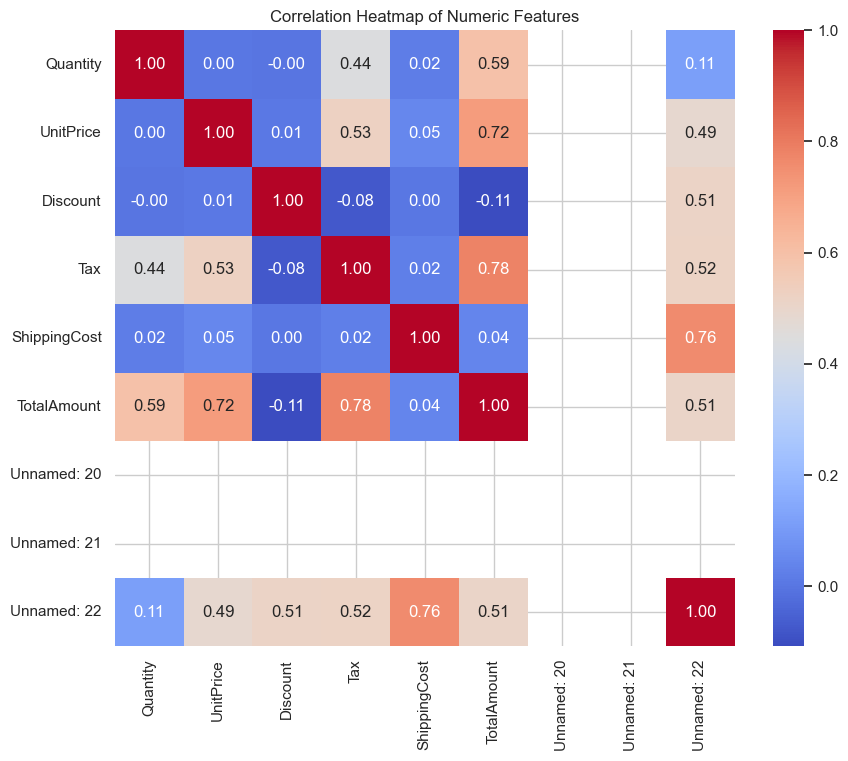

In [7]:
# Select numeric columns for correlation analysis
numeric_df = amazon_data.select_dtypes(include=[np.number])

# Only plot if we have at least four numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

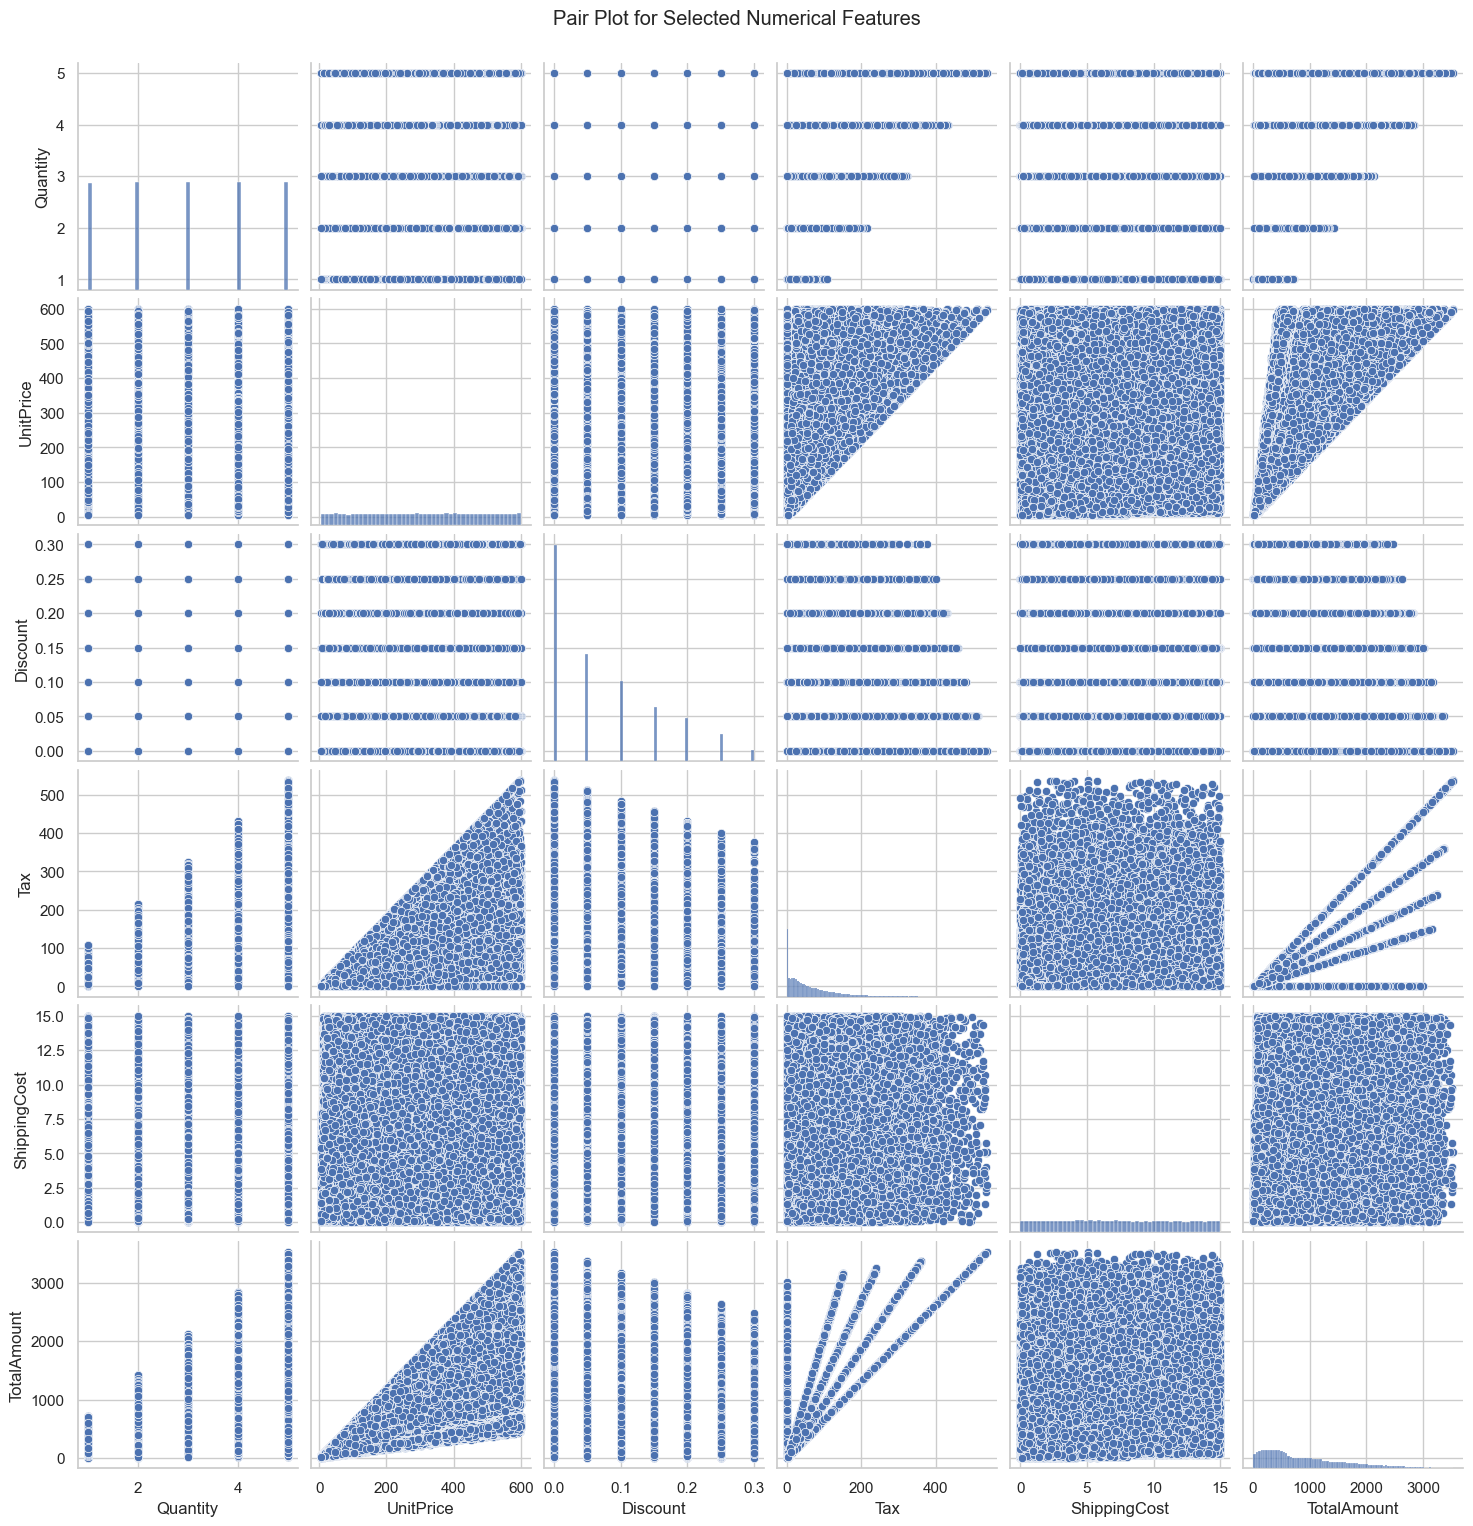

In [8]:
pairplot_cols = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']
if set(pairplot_cols).issubset(amazon_data.columns):
    sns.pairplot(amazon_data[pairplot_cols].dropna())
    plt.suptitle('Pair Plot for Selected Numerical Features', y=1.02)
    plt.show()
else:
    print('Some of the required columns for pair plot are missing.')

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\2785543960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=amazon_data, x='PaymentMethod', palette='viridis')


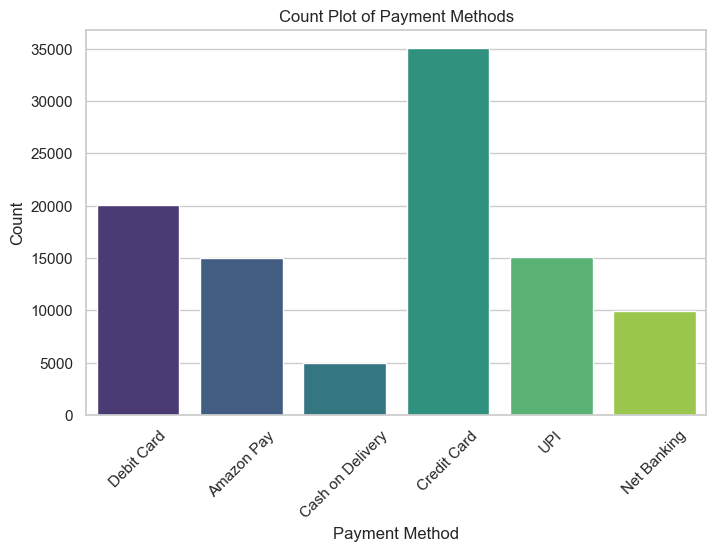

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=amazon_data, x='PaymentMethod', palette='viridis')
plt.title('Count Plot of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\1940032514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=amazon_data, x='Category', y='Discount', palette='Pastel1')


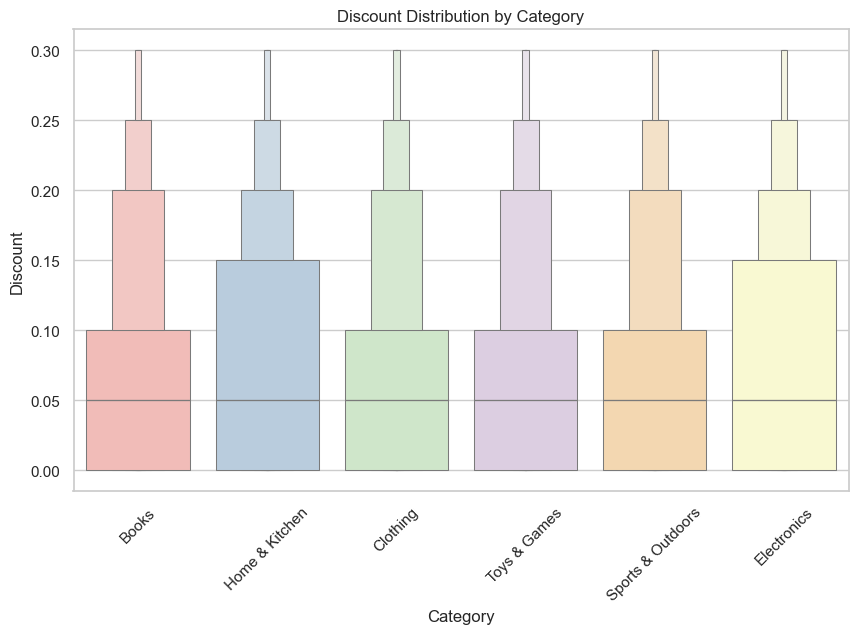

In [10]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=amazon_data, x='Category', y='Discount', palette='Pastel1')
plt.title('Discount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\3286863596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(amazon_data, x='State', y='TotalAmount', errorbar=None,palette='colorblind')


Text(0.5, 1.0, 'Barplot of State vs Total Amount')

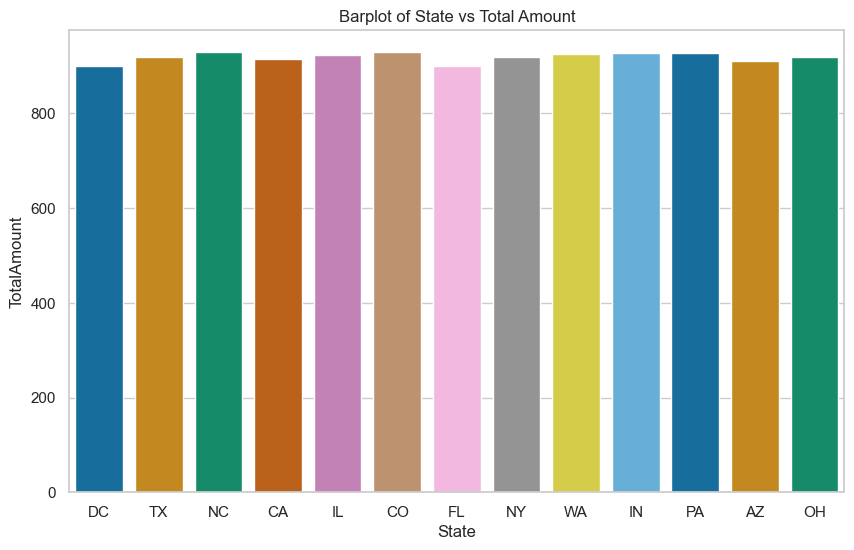

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(amazon_data, x='State', y='TotalAmount', errorbar=None,palette='colorblind')
plt.title(f'Barplot of State vs Total Amount')

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\2047348199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(grp_data.nlargest(10), orient='h', palette='dark')


<Axes: xlabel='UnitPrice', ylabel='City'>

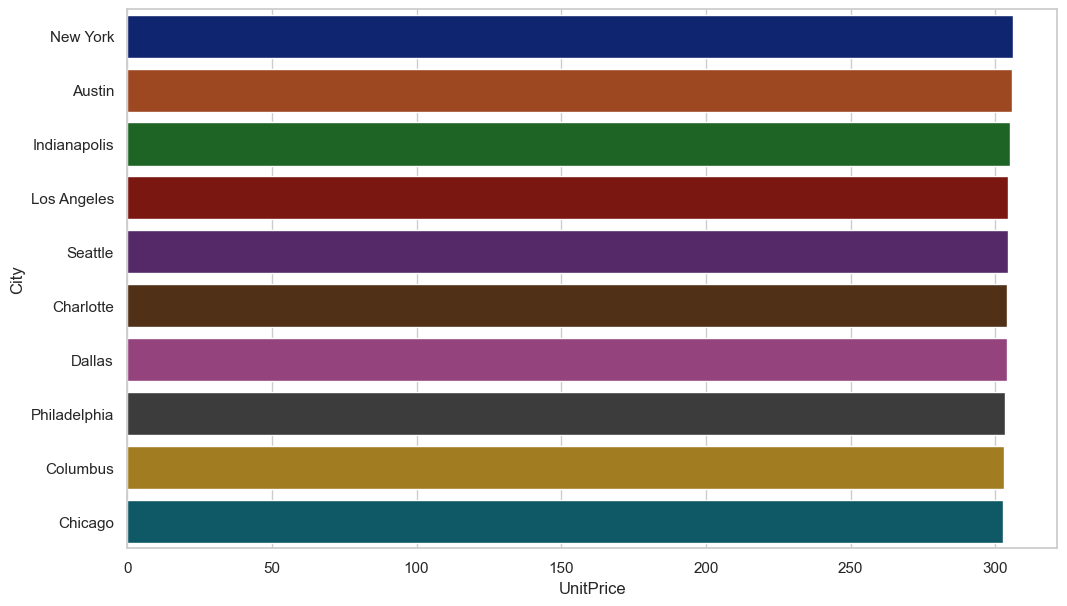

In [12]:
grp_data = amazon_data.groupby('City')['UnitPrice'].mean()

plt.figure(figsize=(12,7))
sns.barplot(grp_data.nlargest(10), orient='h', palette='dark')

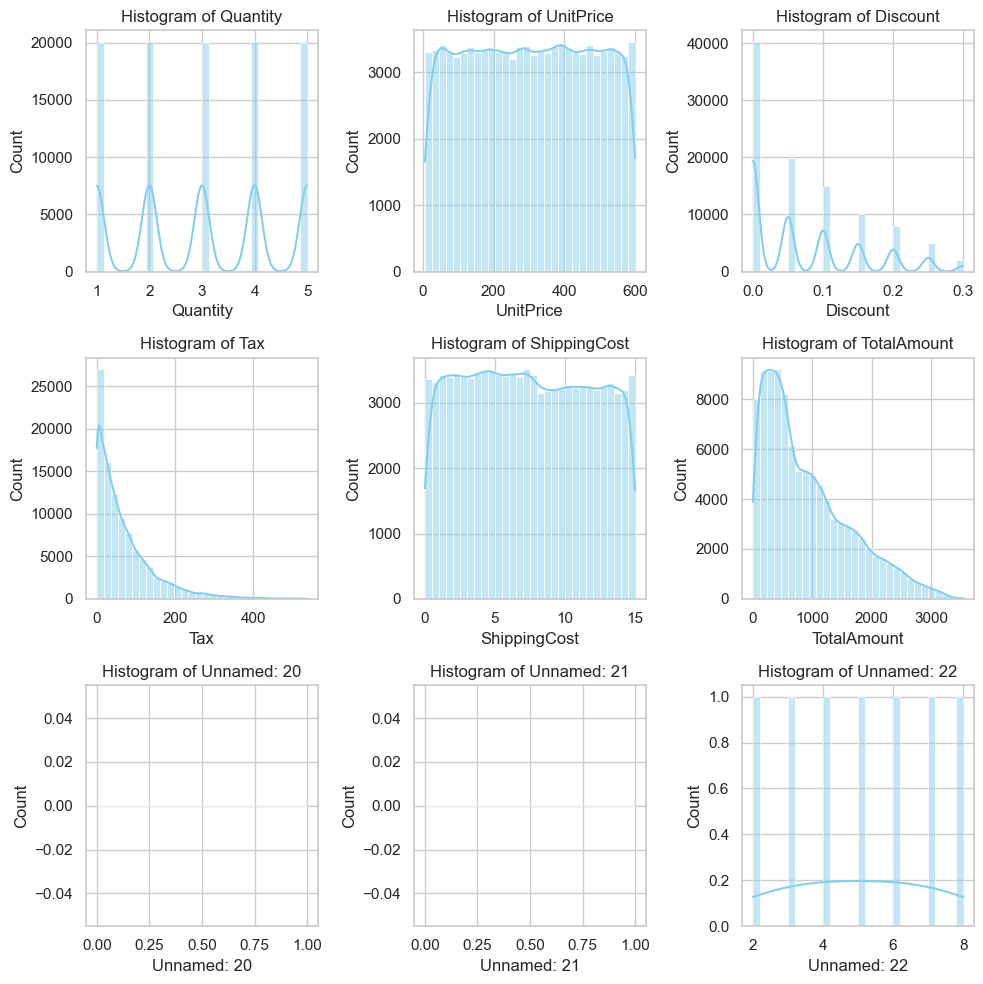

In [13]:
numeric_columns = amazon_data.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3,3, i+1)
    sns.histplot(amazon_data[col], kde=True, bins=30,color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [14]:
amazon_data['Year'] = amazon_data['OrderDate'].dt.year
amazon_data['Month'] = amazon_data['OrderDate'].dt.month
amazon_data['Date'] = amazon_data['OrderDate'].dt.day

Text(0.5, 1.0, 'Regression Plot by Year vs Total Amount')

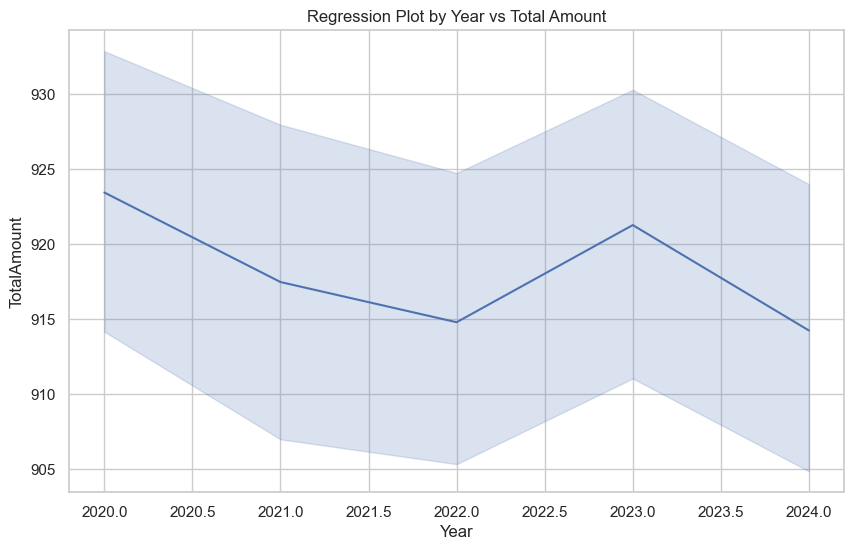

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(amazon_data,x='Year', y='TotalAmount')
plt.title('Regression Plot by Year vs Total Amount')

C:\Users\savita\AppData\Local\Temp\ipykernel_27560\2810246103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=amazon_data, x='OrderStatus', y='TotalAmount', jitter=True, palette='Spectral')


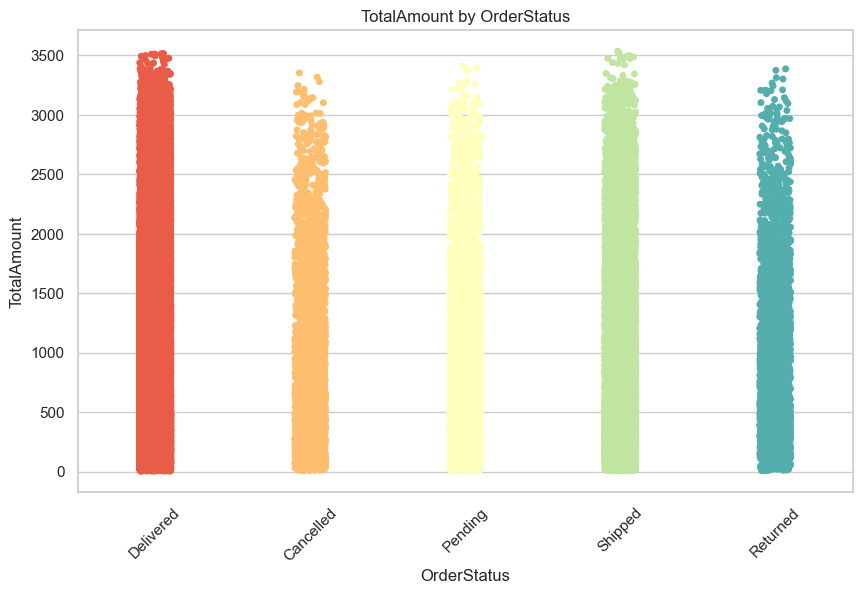

In [16]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=amazon_data, x='OrderStatus', y='TotalAmount', jitter=True, palette='Spectral')
plt.title('TotalAmount by OrderStatus')
plt.xlabel('OrderStatus')
plt.ylabel('TotalAmount')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = amazon_data[['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost']]  
y = amazon_data['TotalAmount'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.9999457473196844
MAE: 3.215782650000009
MSE: 28.25834832499508
RMSE: 5.315858192709347


In [18]:
# feature importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

        Feature  Importance
3           Tax    0.538108
1     UnitPrice    0.246254
0      Quantity    0.199183
2      Discount    0.016410
4  ShippingCost    0.000045


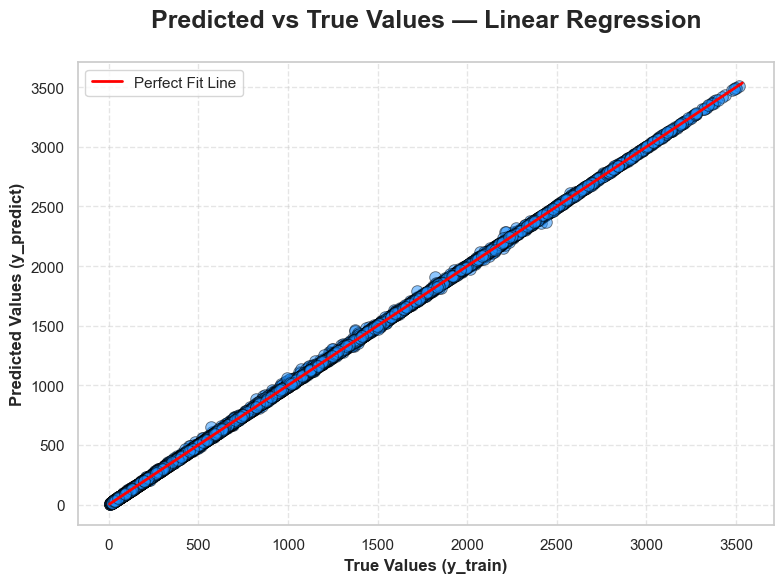

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=70, edgecolor='black', alpha=0.50)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel("True Values (y_train)",fontweight='bold')
plt.ylabel("Predicted Values (y_predict)",fontweight='bold')
plt.title("Predicted vs True Values — Linear Regression\n",fontweight='bold',fontsize=18)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()